In [26]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
pred_df = pd.read_csv('./data/Assistant/prediction/skill_builder_data.csv')
pred_df.sort_values(['user_id','order_id'], inplace=True)
pred_df

,order_id,user_id,problem_id,correct,prediction
138696,21617623,14,93383,0,1.968115e-11
69348,21617632,14,93407,1,2.149392e-06
0,21617641,14,93400,0,2.062879e-14
69349,21617650,14,93419,0,6.181182e-09
1,21617659,14,93420,0,1.955967e-01
138697,21617667,14,93415,0,1.611317e-13
69350,21617675,14,93423,0,9.999733e-01
2,21617692,14,57695,0,2.132006e-10
277392,21617718,14,57696,0,1.158101e-11
138698,21617722,14,57697,0,3.252140e-16


In [3]:
from IRT.wrapper import load_data, DataOpts
data_opts=DataOpts(num_folds=5, item_id_col='problem_id', template_id_col=None, concept_id_col=None, remove_skill_nans=False, seed=0, use_correct=True, use_hints=False, drop_duplicates=True, max_interactions_per_user=None, min_interactions_per_user=2, proportion_students_retained=1.0, meta=True, prediction_output='data/Assistant/prediction/skill_builder_data.csv')
data, _, item_ids, _, _ = load_data("data/Assistant/skill_builder_data.csv", "assistments",data_opts)
data_df=pd.DataFrame.from_csv("data/Assistant/skill_builder_data.csv")
print(data.index)
print(data.index.name)
# df.index
data_df=data_df.loc[data.index].groupby(data.index.name).first()
# data_df['order_id'] = data_df.index
data_df.reset_index(level=0, inplace=True)
data_df.sort_values(['user_id','order_id'], inplace=True)
data_df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.
/home/george/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Int64Index([21617623, 21617632, 21617641, 21617650, 21617659, 21617667,
            21617675, 21617692, 21617718, 21617722,
            ...
            38214237, 38214238, 38214239, 38214240, 38214241, 38214250,
            38214251, 38214252, 38214256, 38214257],
           dtype='int64', name='order_id', length=346740)
order_id


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
17196,21617623,263599,14,53412,93383,1,0,1,26271,tutor,...,2,2,41131,52570,NaN,NaN,1,1.0,1,1.0
17197,21617632,263599,14,53436,93407,1,1,1,29123,tutor,...,0,2,29123,52570,NaN,82.8,0,NaN,2,2.0
17198,21617641,263599,14,53429,93400,1,0,1,13779,tutor,...,2,2,19905,52570,NaN,NaN,1,1.0,3,3.0
17199,21617650,263599,14,53448,93419,1,0,1,16901,tutor,...,2,2,22600,52570,NaN,NaN,1,1.0,4,4.0
17200,21617659,263599,14,53449,93420,1,0,1,11079,tutor,...,2,2,19704,52570,NaN,NaN,1,1.0,5,5.0
17201,21617667,263599,14,53444,93415,1,0,1,8244,tutor,...,2,2,14127,52570,NaN,NaN,1,1.0,6,6.0
17202,21617675,263599,14,53452,93423,1,0,1,21884,tutor,...,3,3,39150,52571,NaN,NaN,1,1.0,7,7.0
17203,21617692,263600,14,36838,57695,1,0,0,59891,tutor,...,0,0,59891,30397,NaN,NaN,2,NaN,8,8.0
17204,21617718,263600,14,36838,57696,0,0,2,7711,tutor,...,0,4,11354,30397,86241.0,NaN,0,NaN,1,NaN
17205,21617722,263600,14,36838,57697,0,0,1,7498,tutor,...,3,3,16505,30397,NaN,NaN,1,1.0,2,NaN


In [6]:
df = data_df.merge(pred_df)
df

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original,prediction
0,21617623,263599,14,53412,93383,1,0,1,26271,tutor,...,2,41131,52570,NaN,NaN,1,1.0,1,1.0,1.968115e-11
1,21617632,263599,14,53436,93407,1,1,1,29123,tutor,...,2,29123,52570,NaN,82.8,0,NaN,2,2.0,2.149392e-06
2,21617641,263599,14,53429,93400,1,0,1,13779,tutor,...,2,19905,52570,NaN,NaN,1,1.0,3,3.0,2.062879e-14
3,21617650,263599,14,53448,93419,1,0,1,16901,tutor,...,2,22600,52570,NaN,NaN,1,1.0,4,4.0,6.181182e-09
4,21617659,263599,14,53449,93420,1,0,1,11079,tutor,...,2,19704,52570,NaN,NaN,1,1.0,5,5.0,1.955967e-01
5,21617667,263599,14,53444,93415,1,0,1,8244,tutor,...,2,14127,52570,NaN,NaN,1,1.0,6,6.0,1.611317e-13
6,21617675,263599,14,53452,93423,1,0,1,21884,tutor,...,3,39150,52571,NaN,NaN,1,1.0,7,7.0,9.999733e-01
7,21617692,263600,14,36838,57695,1,0,0,59891,tutor,...,0,59891,30397,NaN,NaN,2,NaN,8,8.0,2.132006e-10
8,21617718,263600,14,36838,57696,0,0,2,7711,tutor,...,4,11354,30397,86241.0,NaN,0,NaN,1,NaN,1.158101e-11
9,21617722,263600,14,36838,57697,0,0,1,7498,tutor,...,3,16505,30397,NaN,NaN,1,1.0,2,NaN,3.252140e-16


In [79]:
df.sort_values('order_id', inplace=True)
df['time_diff'] = df['order_id'] - df.shift(1)['order_id']
df.sort_values(['user_id','order_id'], inplace=True)
df

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original,prediction,time_diff
0,21617623,263599,14,53412,93383,1,0,1,26271,tutor,...,41131,52570,NaN,NaN,1,1.0,1,1.0,1.968115e-11,704.0
1,21617632,263599,14,53436,93407,1,1,1,29123,tutor,...,29123,52570,NaN,82.8,0,NaN,2,2.0,2.149392e-06,9.0
2,21617641,263599,14,53429,93400,1,0,1,13779,tutor,...,19905,52570,NaN,NaN,1,1.0,3,3.0,2.062879e-14,9.0
3,21617650,263599,14,53448,93419,1,0,1,16901,tutor,...,22600,52570,NaN,NaN,1,1.0,4,4.0,6.181182e-09,9.0
4,21617659,263599,14,53449,93420,1,0,1,11079,tutor,...,19704,52570,NaN,NaN,1,1.0,5,5.0,1.955967e-01,9.0
5,21617667,263599,14,53444,93415,1,0,1,8244,tutor,...,14127,52570,NaN,NaN,1,1.0,6,6.0,1.611317e-13,8.0
6,21617675,263599,14,53452,93423,1,0,1,21884,tutor,...,39150,52571,NaN,NaN,1,1.0,7,7.0,9.999733e-01,8.0
7,21617692,263600,14,36838,57695,1,0,0,59891,tutor,...,59891,30397,NaN,NaN,2,NaN,8,8.0,2.132006e-10,17.0
8,21617718,263600,14,36838,57696,0,0,2,7711,tutor,...,11354,30397,86241.0,NaN,0,NaN,1,NaN,1.158101e-11,26.0
9,21617722,263600,14,36838,57697,0,0,1,7498,tutor,...,16505,30397,NaN,NaN,1,1.0,2,NaN,3.252140e-16,4.0


In [92]:
grpd = df.groupby(['user_id','assignment_id'])['order_id','assignment_id','user_id','correct','template_id','prediction','time_diff']
df.loc[grpd.head(1).index, 'time_diff'] = -1.0
grpd.head()

,order_id,assignment_id,user_id,correct,template_id,prediction,time_diff
346739,38214257,291412,96299,1,29936,1.000000e+00,-1.0
291977,38259778,290764,96215,0,31062,5.411382e-04,-1.0
291978,38259779,290764,96215,0,31062,1.000000e+00,1.0
319354,38174155,291481,96258,0,30482,5.736835e-12,-1.0
319353,38174154,291481,96258,0,30306,9.308490e-01,1.0
319352,38174153,291481,96258,1,30482,8.922161e-01,1.0
319351,38174152,291481,96258,1,30306,1.207763e-15,1.0
319350,38174151,291481,96258,0,30488,9.411586e-11,1.0
291979,38259780,290764,96215,0,31062,9.999403e-01,1.0
319346,38174136,291429,96258,1,55834,9.966625e-01,-1.0


In [72]:
yvals = []
yvals2 = []
for rep in range(0,11):
    no_exp = grpd.nth(rep)
    print('Percent correct for ',rep,' reps: ',no_exp['correct'].sum() / no_exp.shape[0])
    print('Average prediction for ',rep,' reps: ',no_exp['prediction'].mean())
    yvals.append(no_exp['correct'].sum() / no_exp.shape[0])
    yvals2.append(no_exp['prediction'].mean())

Percent correct for  0  reps:  0.654607601446
Average prediction for  0  reps:  0.735473344009
Percent correct for  1  reps:  0.669350243999
Average prediction for  1  reps:  0.698439302874
Percent correct for  2  reps:  0.670286975717
Average prediction for  2  reps:  0.680075193331
Percent correct for  3  reps:  0.689741956037
Average prediction for  3  reps:  0.682612636743
Percent correct for  4  reps:  0.685879736156
Average prediction for  4  reps:  0.676495683845
Percent correct for  5  reps:  0.651157938661
Average prediction for  5  reps:  0.636069887815
Percent correct for  6  reps:  0.644659952754
Average prediction for  6  reps:  0.633149942436
Percent correct for  7  reps:  0.645238666347
Average prediction for  7  reps:  0.642472010233
Percent correct for  8  reps:  0.619514904647
Average prediction for  8  reps:  0.617500158453
Percent correct for  9  reps:  0.63981042654
Average prediction for  9  reps:  0.618742243177
Percent correct for  10  reps:  0.626330823163
Aver

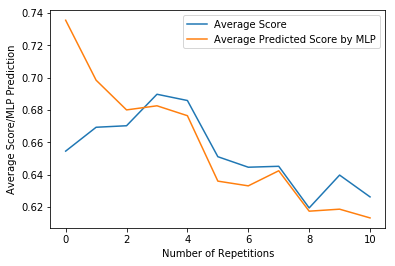

In [115]:
ax = plt.subplot(111)
plt.plot(range(11), yvals, label='Average Score')
plt.plot(range(11), yvals2, label='Average Predicted Score by MLP')
# plt.title('Average Score vs Number of Assignment Repetitions')
plt.ylabel('Average Score/MLP Prediction')
plt.xlabel('Number of Repetitions')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)

In [93]:
df.sort_values('time_diff', inplace=True)
time_grpd = df.groupby('time_diff')['correct','prediction','time_diff']
time_grpd.head()

,correct,prediction,time_diff
346739,1,1.000000e+00,-1.0
157616,1,2.794909e-05,-1.0
18153,1,9.829647e-01,-1.0
110240,1,2.918528e-01,-1.0
52841,1,1.000000e+00,-1.0
324364,0,8.771653e-07,1.0
324396,0,1.094340e-18,1.0
325247,1,1.000000e+00,1.0
312186,1,1.000000e+00,1.0
311763,1,9.999994e-01,1.0


In [103]:
yvals3 = []
yvals4 = []
for rep in range(1,1000):
    no_exp = grpd.nth(rep)
#     print(no_exp['correct'].mean())
#     print('Average prediction for ',rep-1,' reps: ',no_exp['prediction'].mean())
    yvals3.append(no_exp['correct'].mean())
    yvals4.append(no_exp['prediction'].mean())

Text(0.5,0,'Elapsed Time')

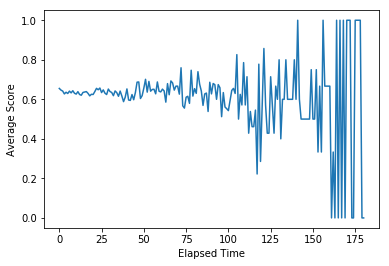

In [116]:
# ax = plt.subplot(111)
plt.plot(range(999), yvals3, label='Average Score')
# plt.plot(range(999), yvals4,'--', label='Average Predicted Score by MLP')
# plt.title('Average Score vs Length of Elapsed Time\nSince Last Assignment')
plt.ylabel('Average Score')
plt.xlabel('Elapsed Time')
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, labels)